# GRIP Nov 2020 @ The Sparks Foundation

# Data Science & Business Analytics Internship

# TASK 2 : Prediction Using Unsupervised ML

## NAME : Brajesh Mohapatra

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

### Reading Data Set

In [12]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Shape of Data

In [13]:
df.shape

(150, 6)

### Data Types

In [14]:
data_types = pd.DataFrame(df.dtypes, columns = ['Types'])
data_types

,Types
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


### Missing Values

In [15]:
missing_values = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_values

,Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### Numerical Analysis

In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Number of Species

In [21]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Converting Species into Number

In [22]:
df['Species'] = df['Species'].map({'Iris-versicolor' : 0, 'Iris-setosa' : 1, 'Iris-virginica' : 2}).astype(int)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### Dropping Id

In [23]:
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Finding Optimum Number of Clusters

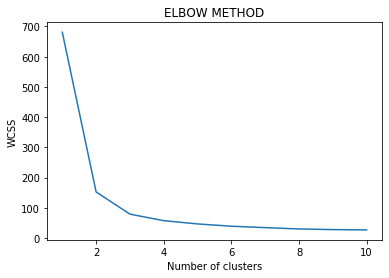

In [24]:
X = df.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 17)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

        So the optimum number of clusters is 3.

### Clustering

In [31]:
kmc = KMeans(n_clusters = 3)
kmc.fit_predict(X)
df['Cluster'] = pd.Series(kmc.labels_)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


### Checking with Confusion Matrix

In [33]:
confusion_matrix(df['Species'], df['Cluster'])

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

        48 Iris-versicolor are correctly predicted and 2 are incorrectly predicted as Iris-virginica.
        All 50 Iris-setosa are correctly predicted.
        36 Iris-virginica are correctly predicted and 14 are incorrectly predicted as Iris-versicolor.

### Accuracy

In [37]:
accuracy_score(df['Species'], df['Cluster'])

0.8933333333333333

### Visual Representation

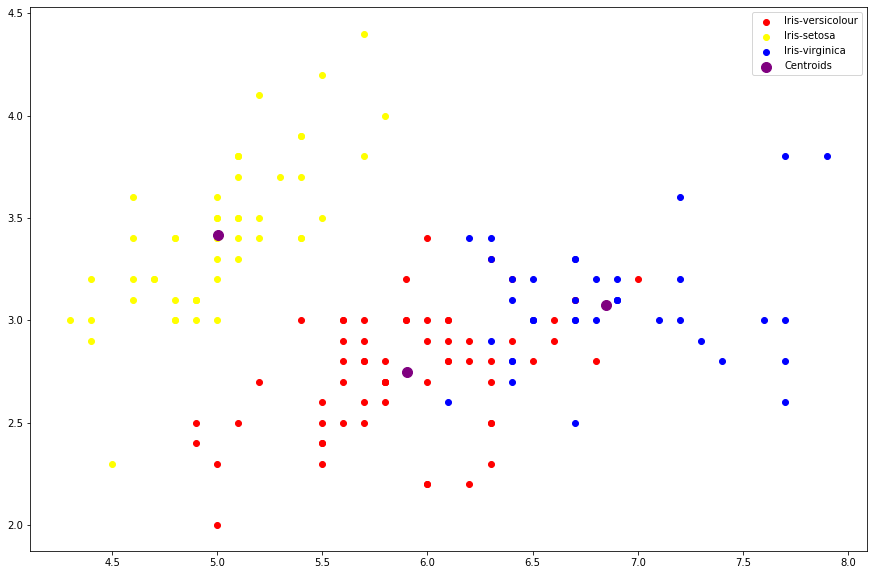

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(X[df['Cluster'] == 0, 0], X[df['Cluster'] == 0, 1], c = 'red', label = 'Iris-versicolour')
plt.scatter(X[df['Cluster'] == 1, 0], X[df['Cluster'] == 1, 1], c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[df['Cluster'] == 2, 0], X[df['Cluster'] == 2, 1], c = 'blue', label = 'Iris-virginica')
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1], s = 100, c = 'purple', label = 'Centroids')
plt.legend()